In [30]:
#Импорт библиотек
import pandas as pd #Библиотека для анализа и обработки данных
import matplotlib.pyplot as plt #Библиотека для создания визуализаций и графиков
import seaborn as sns #Библиотека для построения статистических графиков
import numpy as np #Библиотека для численных расчетов
import warnings #Библиотека для контроля предупреждений

warnings.simplefilter("ignore") #Отключаем все предупреждения, которые могут возникнуть в коде
%matplotlib inline

In [31]:
#Загружаем данные
data = pd.read_csv('https://gist.githubusercontent.com/LazySlav/a1ed424e46144b637fa504f05a70b331/raw/edfd157471ddd4a510c8e76c70c675930d26788e/assignment_1.csv')


In [32]:
data.head() #Частично отобразим DataFrame с помощью метода head() (отображает первые несколько строк)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [33]:
data.describe() #Посмотрим на основные статистики по каждому числовому признаку (столбцу)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [34]:
data.shape #Отобразим сколько в датафрейме строк и колонок

(8693, 14)

In [35]:
#Удалим лишние данные, которые не информативны для модели
data = data.drop(columns=["Name", "PassengerId"])
data.head() #Частично отобразим датафрейм

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [36]:
#Заменим булевые значения (True и False) на 1 и 0 (В столбцах "CryoSleep", "VIP" и "Transported")
data=data.replace({True: 1, False: 0})

In [37]:
#Разделим столбец "Cabin" на 3 столбца "Deck", "Num" и "Side"
data[["Deck", "Num", "Side"]] = data["Cabin"].str.split("/", expand=True)
data = data.drop(columns="Cabin") #Удалим столбец "Cabin"

In [38]:
data.head() #Частично отобразим датафрейм

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [39]:
#Посмотрим, есть ли пропуски
print(data.isnull().sum())

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Deck            199
Num             199
Side            199
dtype: int64


In [40]:
#Выявим категориальные признаки
categorical_features = data.select_dtypes("object")
print(categorical_features)
categorical_features = categorical_features.columns.tolist()
print(categorical_features)

     HomePlanet    Destination Deck   Num Side
0        Europa    TRAPPIST-1e    B     0    P
1         Earth    TRAPPIST-1e    F     0    S
2        Europa    TRAPPIST-1e    A     0    S
3        Europa    TRAPPIST-1e    A     0    S
4         Earth    TRAPPIST-1e    F     1    S
...         ...            ...  ...   ...  ...
8688     Europa    55 Cancri e    A    98    P
8689      Earth  PSO J318.5-22    G  1499    S
8690      Earth    TRAPPIST-1e    G  1500    S
8691     Europa    55 Cancri e    E   608    S
8692     Europa    TRAPPIST-1e    E   608    S

[8693 rows x 5 columns]
['HomePlanet', 'Destination', 'Deck', 'Num', 'Side']


In [41]:
#Заполним пропуски в столбцах
data['HomePlanet'].fillna(data['HomePlanet'].mode()[0], inplace=True) #Заполнение наиболее часто встречающимся значением
data['CryoSleep'].fillna(data['CryoSleep'].median(), inplace=True) #Заполнение медианным значением
data['Destination'].fillna(data['Destination'].mode()[0], inplace=True) #Заполнение наиболее часто встречающимся значением
data['VIP'].fillna(data['VIP'].median(), inplace=True) #Заполнение медианным значением
data['Age'].fillna(data['Age'].median(), inplace=True) #Заполнение медианным значением
data['RoomService'].fillna(0, inplace=True) #Заполнение нулем
data['FoodCourt'].fillna(0, inplace=True) #Заполнение нулем
data['ShoppingMall'].fillna(0, inplace=True) #Заполнение нулем
data['Spa'].fillna(0, inplace=True) #Заполнение нулем
data['VRDeck'].fillna(0, inplace=True) #Заполнение нулем
data['Deck'].fillna(data['Deck'].mode()[0], inplace=True) #Заполнение наиболее часто встречающимся значением
data['Num'].fillna(data['Num'].mode()[0], inplace=True) #Заполнение наиболее часто встречающимся значением
data['Side'].fillna(data['Side'].mode()[0], inplace=True) #Заполнение наиболее часто встречающимся значением

In [42]:
#Проверка пропусков
print(data.isnull().sum())

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Num             0
Side            0
dtype: int64


In [43]:
data.info() #Информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   float64
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   float64
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int64  
 11  Deck          8693 non-null   object 
 12  Num           8693 non-null   object 
 13  Side          8693 non-null   object 
dtypes: float64(8), int64(1), object(5)
memory usage: 950.9+ KB


In [52]:
#В колонке "Side" заменим "P" на 1 и "S" на 0
data["Side"] = [1 if i == "P" else 0 for i in data["Side"]]

#Преобразуем данные из колонки "Num" в числовой тип
data["Num"] = data["Num"].astype(int)

In [51]:
data.info() #Информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   float64
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   float64
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int64  
 11  Deck          8693 non-null   object 
 12  Num           8693 non-null   int64  
 13  Side          8693 non-null   int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 950.9+ KB


In [53]:
#Обновим список категориальных признаков
categorical_features = data.select_dtypes("object")
print(categorical_features)
categorical_features = categorical_features.columns.tolist()
print(categorical_features)

     HomePlanet    Destination Deck
0        Europa    TRAPPIST-1e    B
1         Earth    TRAPPIST-1e    F
2        Europa    TRAPPIST-1e    A
3        Europa    TRAPPIST-1e    A
4         Earth    TRAPPIST-1e    F
...         ...            ...  ...
8688     Europa    55 Cancri e    A
8689      Earth  PSO J318.5-22    G
8690      Earth    TRAPPIST-1e    G
8691     Europa    55 Cancri e    E
8692     Europa    TRAPPIST-1e    E

[8693 rows x 3 columns]
['HomePlanet', 'Destination', 'Deck']


In [55]:
# Нормализация категориальных признаков
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Создаем экземпляр OrdinalEncoder
encoder = OrdinalEncoder()
data[categorical_features] = encoder.fit_transform(data[categorical_features]) #Применяем OrdinalEncoder к категориальным признакам


In [56]:
# Проверка
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   float64
 1   CryoSleep     8693 non-null   float64
 2   Destination   8693 non-null   float64
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   float64
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int64  
 11  Deck          8693 non-null   float64
 12  Num           8693 non-null   int64  
 13  Side          8693 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 950.9 KB


In [57]:
# Импортируем библиотеки
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Делим данные на обучающую и тестовую выборки
X = data.drop(columns='Transported')
y = data['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #30% данных для тестирования

# Стандартизируем данные и создаем модель логистической регрессии
model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear'))
])

In [58]:
# Обучаем модель
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(solver='liblinear'))])

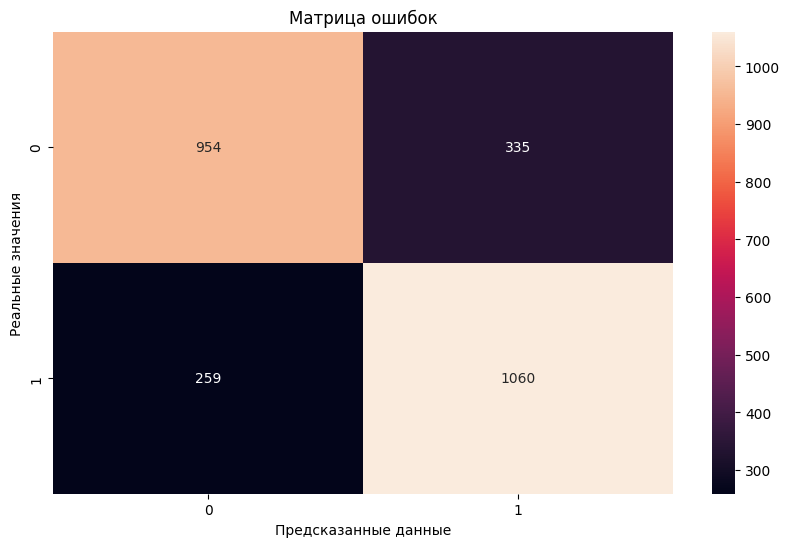

In [63]:
# Матрица ошибок
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('Реальные значения')
plt.xlabel('Предсказанные данные')
plt.title('Матрица ошибок')
plt.show()

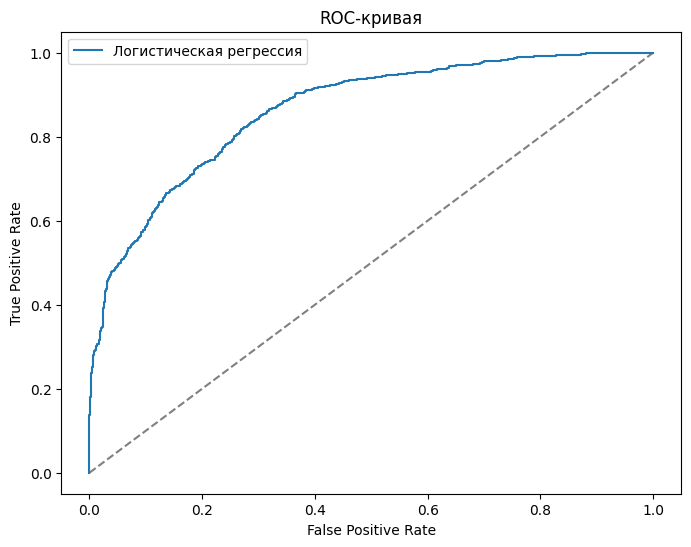

In [67]:
# Построение ROC-кривой
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.plot(fpr, tpr, label="Логистическая регрессия")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.legend()

In [68]:
# Точность модели
print("Точность:", accuracy_score(y_test, y_pred))

Точность: 0.772239263803681
